# Data Cleaning and Exploration

In [ ]:
# Data from 2016

from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


y2016 = pd.read_csv('2016.csv')

y2016.drop(columns=['Country','Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], inplace=True)

y2016['Year'] = 2016

y2016 = y2016[['Region','Happiness Score', 'Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity']]





Saving 2016.csv to 2016.csv


In [ ]:
y2016.head


<bound method NDFrame.head of                               Region  Happiness Score  \
0                     Western Europe            7.526   
1                     Western Europe            7.509   
2                     Western Europe            7.501   
3                     Western Europe            7.498   
4                     Western Europe            7.413   
..                               ...              ...   
152               Sub-Saharan Africa            3.484   
153                    Southern Asia            3.360   
154               Sub-Saharan Africa            3.303   
155  Middle East and Northern Africa            3.069   
156               Sub-Saharan Africa            2.905   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.44178  1.16374                   0.79504  0.57941   
1                     1.52733  1.14524                   0.86303  0.58557   
2                     1.42666  1.18326                

In [ ]:
#setting region as the target variable
characteristics = y2016.columns.drop('Region')
target = 'Region'

print('Characteristics: ', characteristics)
print('Target: ', target)

Characteristics:  Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')
Target:  Region


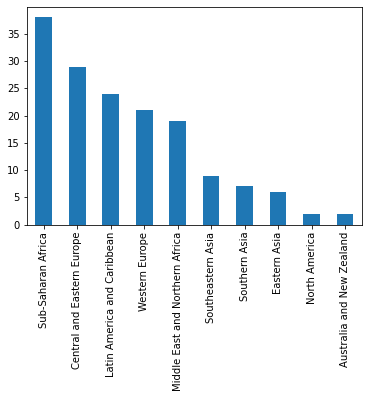

In [ ]:
#Bar graph showing the amount of samples for each region 
import matplotlib.pyplot as plt
%matplotlib inline

y2016[target].value_counts().plot.bar()
plt.show()


In [ ]:
print('Data set shape:', y2016.shape)

print('Western Europe:', sum(y2016[target] == 'Western Europe'))
print('North America:', sum(y2016[target] == 'North America'))
print('Middle East and Northern Africa:', sum(y2016[target] == 'Middle East and Northern Africa'))
print('Latin America and Caribbean :', sum(y2016[target] == 'Latin America and Caribbean'))
print('Central and Eastern Europe :', sum(y2016[target] == 'Central and Eastern Europe'))
print('Eastern Asia :', sum(y2016[target] == 'Eastern Asia'))
print('Southeastern Asia :', sum(y2016[target] == 'Southeastern Asia'))
print('Australia and New Zealand :', sum(y2016[target] == 'Australia and New Zealand'))
print('Sub-Saharan Africa :', sum(y2016[target] == 'Sub-Saharan Africa'))
print('Southern Asia:', sum(y2016[target] == 'Southern Asia'))
#Shows the amount of points in each sample

Data set shape: (157, 8)
Western Europe: 21
North America: 2
Middle East and Northern Africa: 19
Latin America and Caribbean : 24
Central and Eastern Europe : 29
Eastern Asia : 6
Southeastern Asia : 9
Australia and New Zealand : 2
Sub-Saharan Africa : 38
Southern Asia: 7


In [ ]:
#Upsampling the data to 38 points. From https://k-thorson.medium.com/k-nearest-neighbors-world-happiness-index-2021-96a6f4b2e70
from sklearn.utils import shuffle
Western_Europe = y2016[y2016[target] == 'Western Europe']
North_America = y2016[y2016[target] == 'North America']
Middle_East_and_Northern_Africa = y2016[y2016[target] == 'Middle East and Northern Africa']
LatinAmerica_and_Caribbean = y2016[y2016[target] == 'Latin America and Caribbean']
Central_and_Eastern_Europe = y2016[y2016[target] == 'Central and Eastern Europe']
Eastern_Asia = y2016[y2016[target] == 'Eastern Asia']
Southeastern_Asia = y2016[y2016[target] == 'Southeastern Asia']
Australia_and_New_Zealand = y2016[y2016[target] == 'Australia and New Zealand']
SubSaharan_Africa = y2016[y2016[target] == 'Sub-Saharan Africa']
Southern_Asia = y2016[y2016[target] == 'Southern Asia']

WE = Western_Europe.sample(n=len(SubSaharan_Africa), replace=True)
NA = North_America.sample(n=len(SubSaharan_Africa), replace=True)
MENA = Middle_East_and_Northern_Africa.sample(n=len(SubSaharan_Africa), replace=True)
LAC = LatinAmerica_and_Caribbean.sample(n=len(SubSaharan_Africa), replace=True)
CEE = Central_and_Eastern_Europe.sample(n=len(SubSaharan_Africa), replace=True)
EA = Eastern_Asia.sample(n=len(SubSaharan_Africa), replace=True)
SEA = Southeastern_Asia.sample(n=len(SubSaharan_Africa), replace=True)
ANZ = Australia_and_New_Zealand.sample(n=len(SubSaharan_Africa), replace=True)
SA = Southern_Asia.sample(n=len(SubSaharan_Africa), replace=True)


upsampled = pd.concat([SubSaharan_Africa, WE, NA, MENA, LAC,
                         CEE, EA, SEA,ANZ, SA])
upsampled = shuffle(upsampled)

# KNN Classification Model

In [ ]:
#Finding the optimal K value using a rule of thumb https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,the%20most%20favorable%20K%20value.
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import math 
scaler = MinMaxScaler()
upsampled[characteristics] = scaler.fit_transform(upsampled[characteristics])
X_train = upsampled[characteristics]
y_train = upsampled[target]
K_value = math.sqrt(157)
print("Optimal K-value:",K_value)


Optimal K-value: 12.529964086141668


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

#Predictions and score using the optimal K value rounded up to 13
classifier = KNeighborsClassifier(n_neighbors = 13)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_train)

print(classification_report(y_train, predictions))
print("Train accuracy:", accuracy_score(y_train, predictions))

                                 precision    recall  f1-score   support

      Australia and New Zealand       0.88      1.00      0.94        38
     Central and Eastern Europe       0.68      0.66      0.67        38
                   Eastern Asia       0.66      1.00      0.79        38
    Latin America and Caribbean       0.71      0.84      0.77        38
Middle East and Northern Africa       0.80      0.63      0.71        38
                  North America       0.76      1.00      0.86        38
              Southeastern Asia       0.91      0.79      0.85        38
                  Southern Asia       0.77      0.87      0.81        38
             Sub-Saharan Africa       0.88      0.76      0.82        38
                 Western Europe       1.00      0.21      0.35        38

                       accuracy                           0.78       380
                      macro avg       0.80      0.78      0.76       380
                   weighted avg       0.80      0